In [1]:
import seaborn as sns
import pandas as pd

In [2]:
p_df = sns.load_dataset('penguins')

In [3]:
p_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
p_df = p_df.dropna()

## X-y split

In [97]:
X = p_df[['flipper_length_mm','bill_length_mm','bill_depth_mm']]
y = p_df[['body_mass_g']]

## Train-test split

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 100)

In [131]:
from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

## Creating our model

In [100]:
from sklearn.linear_model import LinearRegression

In [135]:
lm = LinearRegression()

In [136]:
model = lm.fit(X_train_scaled, y_train)

In [137]:
model.coef_

array([[700.91763287,  -6.4960112 ,  42.16639494]])

In [123]:
model.intercept_

array([4187.24899598])

In [30]:
import numpy as np

## Predict the weight of a random penguin

In [34]:
random_peng = np.array([215]).reshape(-1,1)

In [35]:
model.predict(random_peng)

C:\Users\Aleks\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[4881.71298884]])

## Create "real vs predicted" DataFrame

In [105]:
y_pred = np.array(model.predict(X_test))

In [58]:
y_test.reset_index(inplace=True)

In [54]:
pd.DataFrame(y_pred)[0]

0     3524.705433
1     4397.067433
2     4881.712989
3     3670.099100
4     4590.925656
         ...     
79    4639.390211
80    3573.169989
81    3330.847211
82    3427.776322
83    3960.886433
Name: 0, Length: 84, dtype: float64

In [47]:
y_pred.shape

(84, 1)

In [59]:
real_vs_pred = pd.DataFrame({'y_test': y_test['body_mass_g'], 'y_pred':pd.DataFrame(y_pred)[0]})

In [60]:
real_vs_pred

,y_test,y_pred
0,3350.0,3524.705433
1,4550.0,4397.067433
2,4850.0,4881.712989
3,3450.0,3670.099100
4,4600.0,4590.925656
...,...,...
79,4550.0,4639.390211
80,3050.0,3573.169989
81,3075.0,3330.847211
82,3700.0,3427.776322


## Compute the MSE

In [64]:
from sklearn.metrics import mean_squared_error as mse

In [65]:
mse(real_vs_pred['y_test'], real_vs_pred['y_pred'])

165251.77220034634

In [67]:
import matplotlib.pyplot as plt

In [73]:
y_test

,index,body_mass_g
0,184,3350.0
1,181,4550.0
2,340,4850.0
3,52,3450.0
4,296,4600.0
...,...,...
79,225,4550.0
80,142,3050.0
81,102,3075.0
82,15,3700.0


In [80]:
y_pred = y_pred.reshape(84,)

In [81]:
y_test['body_mass_g'].shape

(84,)

## Linear Regression using statsmodels

In [140]:
X_train_const = sm.add_constant(X_train.to_numpy())

model = sm.OLS(y_train, X_train_const).fit()
predictions_train = model.predict(X_train_const)

X_test_const = sm.add_constant(X_test)
y_pred = model.predict(X_test_const)
print_model = model.summary()
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     247.5
Date:                Wed, 08 Nov 2023   Prob (F-statistic):           7.57e-74
Time:                        14:51:05   Log-Likelihood:                -1836.8
No. Observations:                 249   AIC:                             3682.
Df Residuals:                     245   BIC:                             3696.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6262.4070    641.715     -9.759      0.000   -7526.388   -4998.426
x1            50.5194      2.790     18.107      0.000      45.024      56.015
x2            -1.2218      6.126     -0.199      0.842     -13.289      10.845
x3            21.2234     15.537      1.366      0.173      -9.380      51.826
==============================================================================
Omnibus:                        4.399   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.111   Jarque-Bera (JB):                4.111
Skew:                           0.307   Prob(JB):                        0.128
Kurtosis:                       3.142   Cond. No.                     5.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Taking a look at some plots

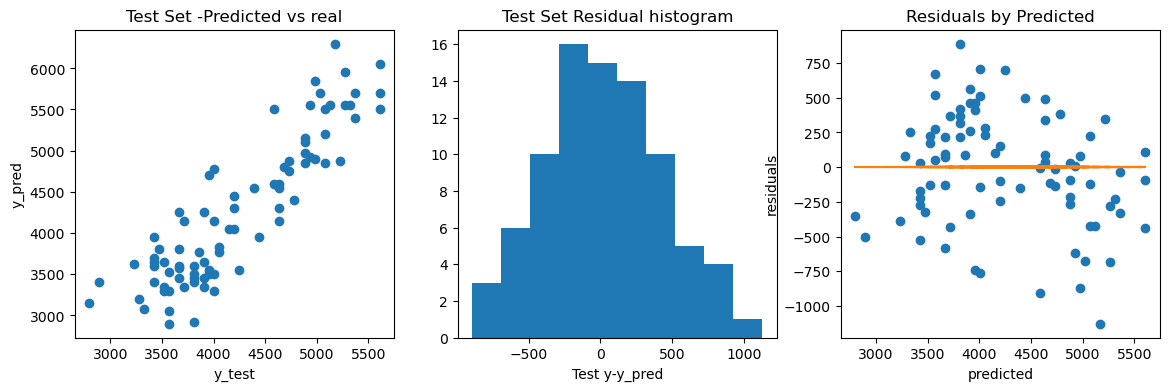

In [82]:
## Plot y_pred vs y_test
fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test['body_mass_g'], 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set -Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.
# Does it ressemble a normal distribution?
ax[1].hist(y_test['body_mass_g'] - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

# Homoscedasticity
ax[2].plot(y_pred,np.array(y_pred)-np.array(y_test['body_mass_g']),"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

## Plotting the feature importances

In [124]:
coefficients = model.coef_.reshape(-1,1)

In [125]:
coefficients = coefficients.reshape(3,)

In [126]:
coefficients.shape

(3,)

In [127]:
feature_importances = pd.DataFrame({'variable':X.columns, 'coefficient': coefficients})

In [138]:
feature_importances

,variable,coefficient
0,flipper_length_mm,700.917633
1,bill_length_mm,-6.496011
2,bill_depth_mm,42.166395


<Axes: xlabel='variable', ylabel='coefficient'>

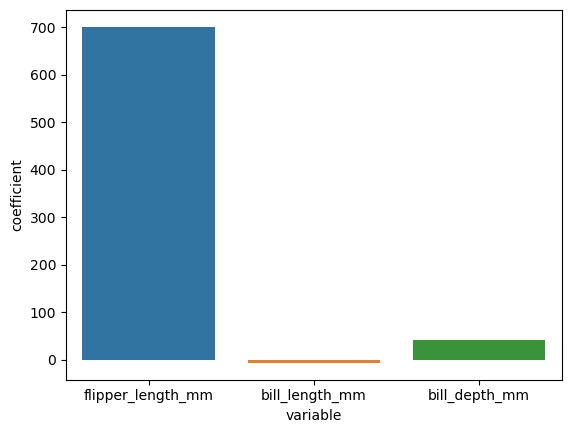

In [139]:
sns.barplot(x=feature_importances['variable'], y=feature_importances['coefficient'])